In [1]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.optim import SGD as torch_SGD
import matplotlib.pyplot as plt
import torchvision.transforms as T 
from PIL import Image

In [5]:
from model import Model
from torch import load

model = Model()
path_train = '../data/train_data.pkl'
path_val = '../data/val_data.pkl'
noisy_imgs_1, noisy_imgs_2 = load(path_train)
noisy_imgs_1 = noisy_imgs_1
noisy_imgs_2 = noisy_imgs_2
noisy_imgs , clean_imgs = load(path_val)

model.load_pretrained_model()

#model.optimizer.lr = 1e-2
# model.train(noisy_imgs_1, noisy_imgs_2, 100)

out = model.predict(noisy_imgs)

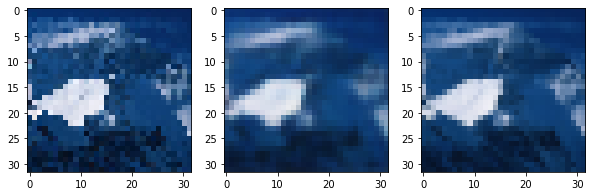

In [6]:
transform = T.ToPILImage()
k = 7
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(1, 3,2)
plt.imshow(transform(out[k]));
plt.subplot(1, 3,3)
plt.imshow(transform(clean_imgs[k]));

In [10]:
def compute_psnr(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y) ** 2).mean((1,2,3))).mean()
compute_psnr(out.cpu().float()/256, clean_imgs.cpu().float()/256)

def compute_psnr_image(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y) ** 2).mean((1,2,3)))
psnr_comp = compute_psnr_image(noisy_imgs.float()/255, clean_imgs.float()/255)
psnr = compute_psnr_image(out.cpu().float()/255, clean_imgs.float()/255)

(-0.5, 31.5, 31.5, -0.5)

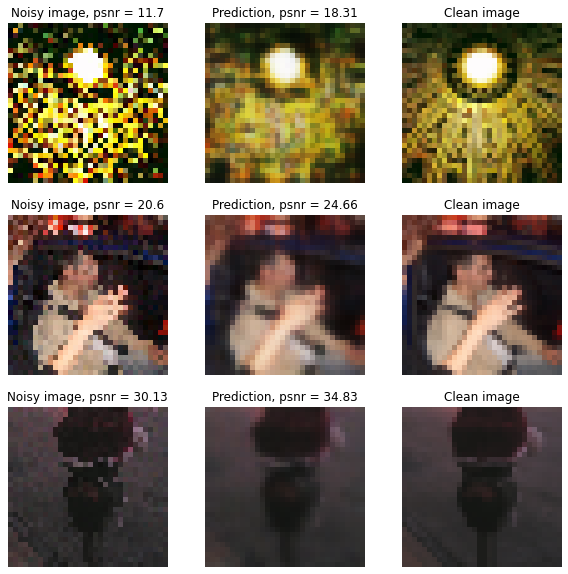

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T 
from PIL import Image
transform = T.ToPILImage()
k = 908
plt.figure(figsize = [10, 10])
plt.subplot(3, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.axis('off')
plt.subplot(3, 3,2)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,3)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')

k = 910
# plt.figure(figsize = [10, 5])
plt.subplot(3, 3,4)
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.imshow(transform(noisy_imgs[k]));
plt.axis('off')
plt.subplot(3, 3,5)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,6)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')
k=105
# k= 978
# plt.figure(figsize = [10, 5])
plt.subplot(3, 3,7)
plt.title('Noisy image, psnr = '+ str(round(psnr_comp[k].item(), 2)))
plt.imshow(transform(noisy_imgs[k]));
plt.axis('off')
plt.subplot(3, 3,8)
plt.title('Prediction, psnr = ' + str(round(psnr[k].item(), 2)))
plt.imshow(transform(out[k]));
plt.axis('off')
plt.subplot(3, 3,9)
plt.title('Clean image')
plt.imshow(transform(clean_imgs[k]));
plt.axis('off')

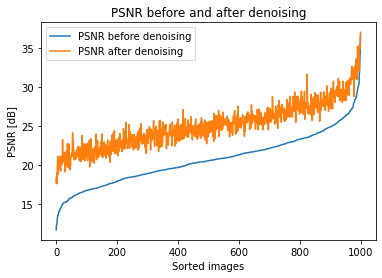

In [12]:
# print(torch.argsort(psnr))
asort = torch.argsort(psnr_comp)
plt.plot(psnr_comp[asort], label = 'PSNR before denoising')
plt.plot(psnr[asort], label = 'PSNR after denoising')
plt.title('PSNR before and after denoising')
plt.xlabel('Sorted images')
plt.ylabel('PSNR [dB]')
plt.legend()

In [13]:
psnr.mean() - psnr_comp.mean()


tensor(4.3680)

In [5]:
model.save_model()

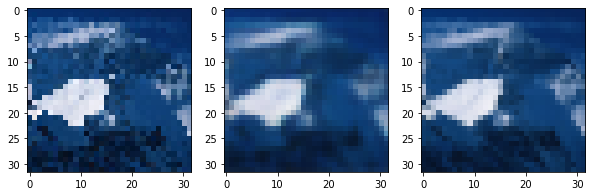

In [6]:
new_model = Model()
new_model.load_model()
out2 = new_model.predict(noisy_imgs[0:10])
transform = T.ToPILImage()
k = 7
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(1, 3,2)
plt.imshow(transform(out2[k]));
plt.subplot(1, 3,3)
plt.imshow(transform(clean_imgs[k]));

In [7]:
print(noisy_imgs.dtype)
print(out.dtype)

torch.uint8
torch.uint8


In [8]:
from pathlib import Path
# p = pathlib.PurePosixPath('.')